In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

# Rank difference analysis 

In [2]:
with open("sports.json") as g:
    sports_list = json.load(g)
      
sports_list['sports_list'][2] = 'water_polo' 

sports_array = {} # key = name of sport, values = excel in exports folder

sports = list(sports_list.values())[0]  # Extract the list from the dict_values object
sports = sorted(sports)  # Sort the list alphabetically

for sport in sports:
    sports_array[sport] = (pd.read_excel("matches_rank_sports/matches_rank_"+ sport +".xlsx"))

sports_array["rugby"]

,Year,Player 1,Player 1 Rank,Player 2,Player 2 Rank,Winner,Match Number,Total Matches,Rank Diff,Progression,Match Diff,Tournament Level
0,2003,Australia,3,Argentina,9,Australia,1,48,6,0.020833,47,Qualifications
1,2003,Ireland,6,Romania,14,Ireland,2,48,8,0.041667,46,Qualifications
2,2003,Argentina,9,Namibia,20,Argentina,3,48,11,0.062500,45,Qualifications
3,2003,Australia,3,Romania,14,Australia,4,48,11,0.083333,44,Qualifications
4,2003,Ireland,6,Namibia,20,Ireland,5,48,14,0.104167,43,Qualifications
...,...,...,...,...,...,...,...,...,...,...,...,...
320,1987,England,5,Wales,2,Wales,27,31,3,0.870968,4,Quarterfinals
321,1987,Australia,3,France,4,France,28,31,1,0.903226,3,Quarterfinals
322,1987,New Zealand,1,Wales,2,New Zealand,29,31,1,0.935484,2,Semifinals
323,1987,Australia,3,Wales,2,Wales,30,31,1,0.967742,1,Semifinals


In [3]:
rank_diff_data = [] # list of pandas series used for boxplot 

for sport in sports:
    rank_diff_data.append(sports_array[sport]["Rank Diff"])

Finding the median, mean, and Q3 for all sports 

In [4]:
####################### MEDIAN #######################
# Find the median of each series
series_medians = [series.median() for series in rank_diff_data]

# Find the median across all of the series
overall_median = np.median(series_medians)

print("Median of each series:", series_medians)
print("Median across all series:", overall_median,"\n")


####################### MEAN #######################
# Find the mean of each series
series_means = [series.mean() for series in rank_diff_data]

# Find the mean across all of the series
overall_mean = np.mean(series_means)

print("Mean of each series:", series_means)
print("Mean across all series:", overall_mean,"\n")


####################### Q3 #######################
# Find the third quartile (Q3) of each series
series_q3 = [series.quantile(0.75) for series in rank_diff_data]

# Find the third quartile (Q3) across all series
overall_q3 = np.percentile(series_q3, 75)

print("Third quartile (Q3) of each series:", series_q3)
print("Third quartile (Q3) across all series:", overall_q3,"\n")

Median of each series: [4.0, 3.0, 4.0, 5.0, 4.0, 3.0, 4.0, 5.0, 5.0, 8.0, 4.0, 2.0]
Median across all series: 4.0 

Mean of each series: [4.516722408026756, 4.582278481012659, 4.44031007751938, 6.463592233009709, 4.143203883495145, 4.082788671023965, 6.467320261437909, 5.750972762645914, 6.384615384615385, 9.110429447852761, 4.066037735849057, 2.8721804511278197]
Mean across all series: 5.240037649801372 

Third quartile (Q3) of each series: [6.0, 6.0, 6.0, 9.0, 6.0, 6.0, 9.0, 8.0, 9.0, 13.0, 6.0, 4.0]
Third quartile (Q3) across all series: 9.0 



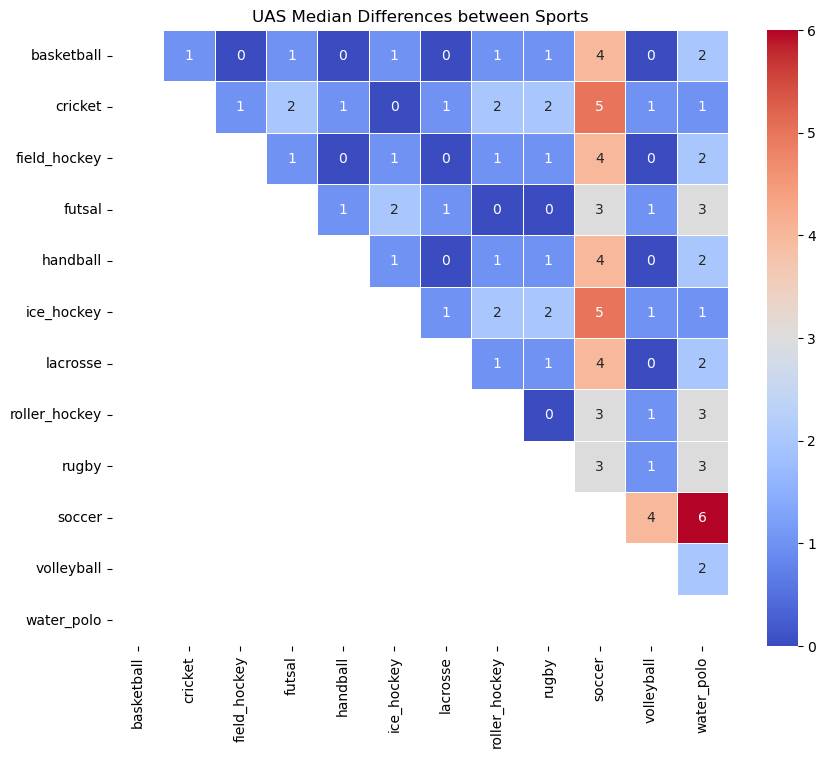

In [5]:
import seaborn as sns

# Create a 14x14 matrix to hold the pairwise differences between medians
n_sports = len(sports)
median_diff_matrix = np.zeros((n_sports, n_sports))

# Populate the upper triangular part of the matrix with median differences
for i in range(n_sports):
    for j in range(i+1, n_sports):
        median_diff_matrix[i, j] = abs(series_medians[i] - series_medians[j])

# Create a mask for the lower triangular part (we only want to show the upper triangular part)
mask = np.tril(np.ones_like(median_diff_matrix, dtype=bool))

# Plot the heatmap of the upper triangular part using a color scale
plt.figure(figsize=(10, 8))
sns.heatmap(median_diff_matrix, mask=mask, annot=True, cmap='coolwarm', 
            square=True, linewidths=0.5, xticklabels=sports, yticklabels=sports)

# Set plot title and display the plot
plt.title('UAS Median Differences between Sports')
plt.show()


[]

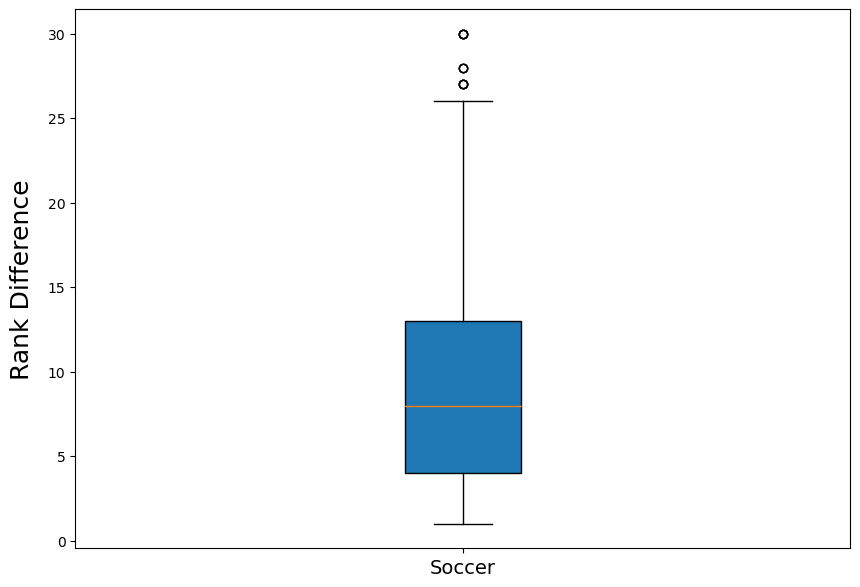

In [6]:
figure = plt.figure(figsize=(10,7))

boxplot = plt.boxplot(rank_diff_data[9], patch_artist=True, labels = ["Soccer"])

plt.ylabel("Rank Difference", fontsize=18, labelpad=10)

# Increase the font size of the labels
plt.xticks(fontsize=14)

# Set ticks on the y-axis at integer values starting from 1
plt.yticks(range(0, max(rank_diff_data[9]) + 1, 5))

plt.plot()

[]

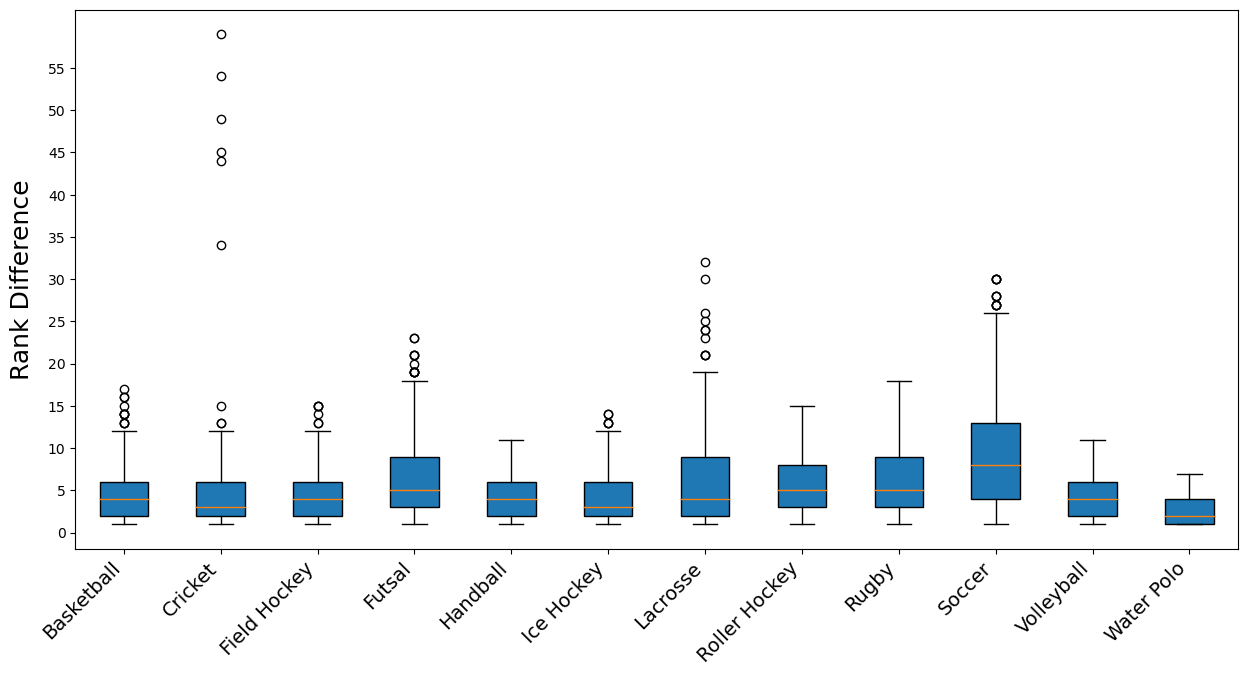

In [7]:
figure = plt.figure(figsize=(15,7))

sports_labels = ['Basketball','Cricket','Field Hockey','Futsal','Handball','Ice Hockey','Lacrosse','Roller Hockey','Rugby','Soccer','Volleyball','Water Polo']

boxplot = plt.boxplot(rank_diff_data, patch_artist=True, labels = sports_labels)

plt.ylabel("Rank Difference", fontsize=18, labelpad=10)

# Increase the font size of the labels
plt.xticks(rotation=45, ha="right", fontsize=14)

max_value_list=[]

for i in rank_diff_data:
    max_value_list.append(max(i))

# Set ticks on the y-axis at integer values starting from 1
plt.yticks(range(0, max(max_value_list) + 1, 5))

plt.plot()

In [8]:
for items in boxplot["means"]:
    print(sports[boxplot["means"].index(items)], items.get_ydata()[1])

In [9]:
# Creating a second column with the sports name for each rank difference value 
sports_name_list = []
for sport in sports:
    i = sports.index(sport)
    length = 0 

    length = len(rank_diff_data[i])
    sports_name_list.append([sport] * length)

len(sports_name_list[0])

598

In [10]:
df = pd.DataFrame()
for i in range(len(sports)): 
    temp = pd.DataFrame({"Sport": sports_name_list[i], "Rank Difference": rank_diff_data[i]})
    df = pd.concat([df, temp], ignore_index=True)

df.to_excel("matches_rank_sports/rank_diff_boxplot_data.xlsx")

In [11]:
volleyball, futsal, water_pollo, roller_hockey, soccer, basketball, handball, ice_hockey, cricket, lacrosse, field_hockey, rugby = rank_diff_data


In [18]:
rank_diff_data[9].max()

30